In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

# Define paths
RAW_IMAGE_DIR = "../data/raw"
SAMPLE_IMAGE_PATH = sorted(glob.glob(f"{RAW_IMAGE_DIR}/*.png"))[0]  # Pick one sample for visualization


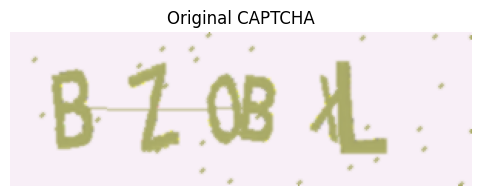

In [2]:
def show_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(6, 2))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load sample image using PIL
original_img = Image.open(SAMPLE_IMAGE_PATH)
show_image(original_img, title="Original CAPTCHA")


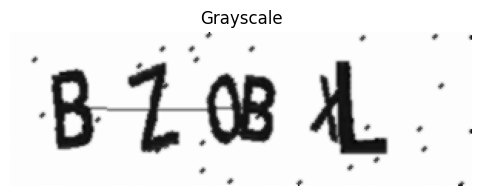

In [3]:
# Convert PIL Image to OpenCV format
img_cv = cv2.cvtColor(np.array(original_img), cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
show_image(gray_img, title="Grayscale")

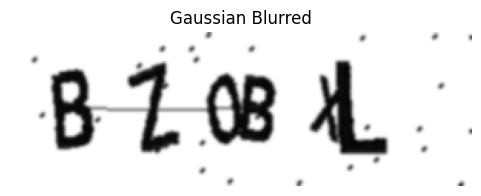

In [4]:
blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
show_image(blurred_img, title="Gaussian Blurred")


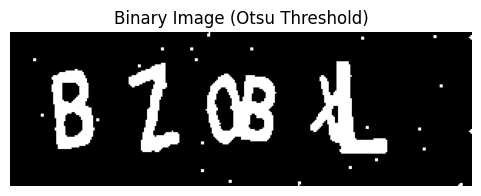

In [5]:
_, binary_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image(binary_img, title="Binary Image (Otsu Threshold)")

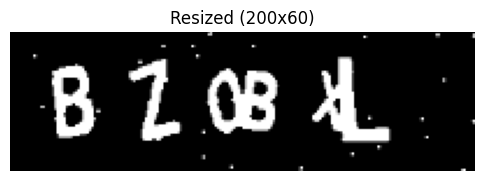

In [6]:
# Resize to 200x60 for example
TARGET_WIDTH, TARGET_HEIGHT = 200, 60
resized_img = cv2.resize(binary_img, (TARGET_WIDTH, TARGET_HEIGHT))
show_image(resized_img, title=f"Resized ({TARGET_WIDTH}x{TARGET_HEIGHT})")

In [7]:
# Convert to float32 and normalize
normalized_img = resized_img.astype(np.float32) / 255.0
print("Image shape:", normalized_img.shape)
print("Pixel range:", normalized_img.min(), "to", normalized_img.max())

Image shape: (60, 200)
Pixel range: 0.0 to 1.0


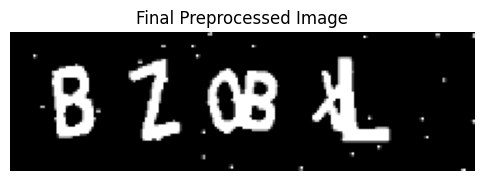

In [8]:
def preprocess_captcha(image_path):
    pil_img = Image.open(image_path)
    img_cv = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    _, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(binary, (TARGET_WIDTH, TARGET_HEIGHT))
    normalized = resized.astype(np.float32) / 255.0
    return normalized

processed = preprocess_captcha(SAMPLE_IMAGE_PATH)
show_image(processed, title="Final Preprocessed Image")